# Short demo
In this demo, I run the code on three sample fluorescence images borrowed from Sweeney and Hochgreb's paper ["Autonomous extraction of optimal flame fronts in OH planar laser-induced fluorescence images"](https://opg.optica.org/ao/fulltext.cfm?uri=ao-48-19-3866&id=183266) (2019).
\
\
These images are binarized using Otsu's method, first using OpenCV's built-in capabilities, and then using my personal implementation. Moreover, I show how this equivalent to running the k-means clustering algorithm in 1D, with one cluster only.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from otsu_segmentation import otsu
from sklearn.cluster import KMeans

/Users/oussamachaib/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Plotting settings
fnt = 8 # Font size
plt.rcParams['text.usetex'] = True # TeX font
plt.rcParams['font.family'] = 'serif' # Serif type
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' # AMS-LaTeX package
cMap = 'magma' # Colormap

----------------
Image 1
----------------
OpenCV implementation : Otsu threshold = 95
Personal implementation : Otsu threshold = 95
k-means : Threshold = 95


----------------
Image 2
----------------
OpenCV implementation : Otsu threshold = 105
Personal implementation : Otsu threshold = 105
k-means : Threshold = 105


----------------
Image 3
----------------
OpenCV implementation : Otsu threshold = 89
Personal implementation : Otsu threshold = 89
k-means : Threshold = 89




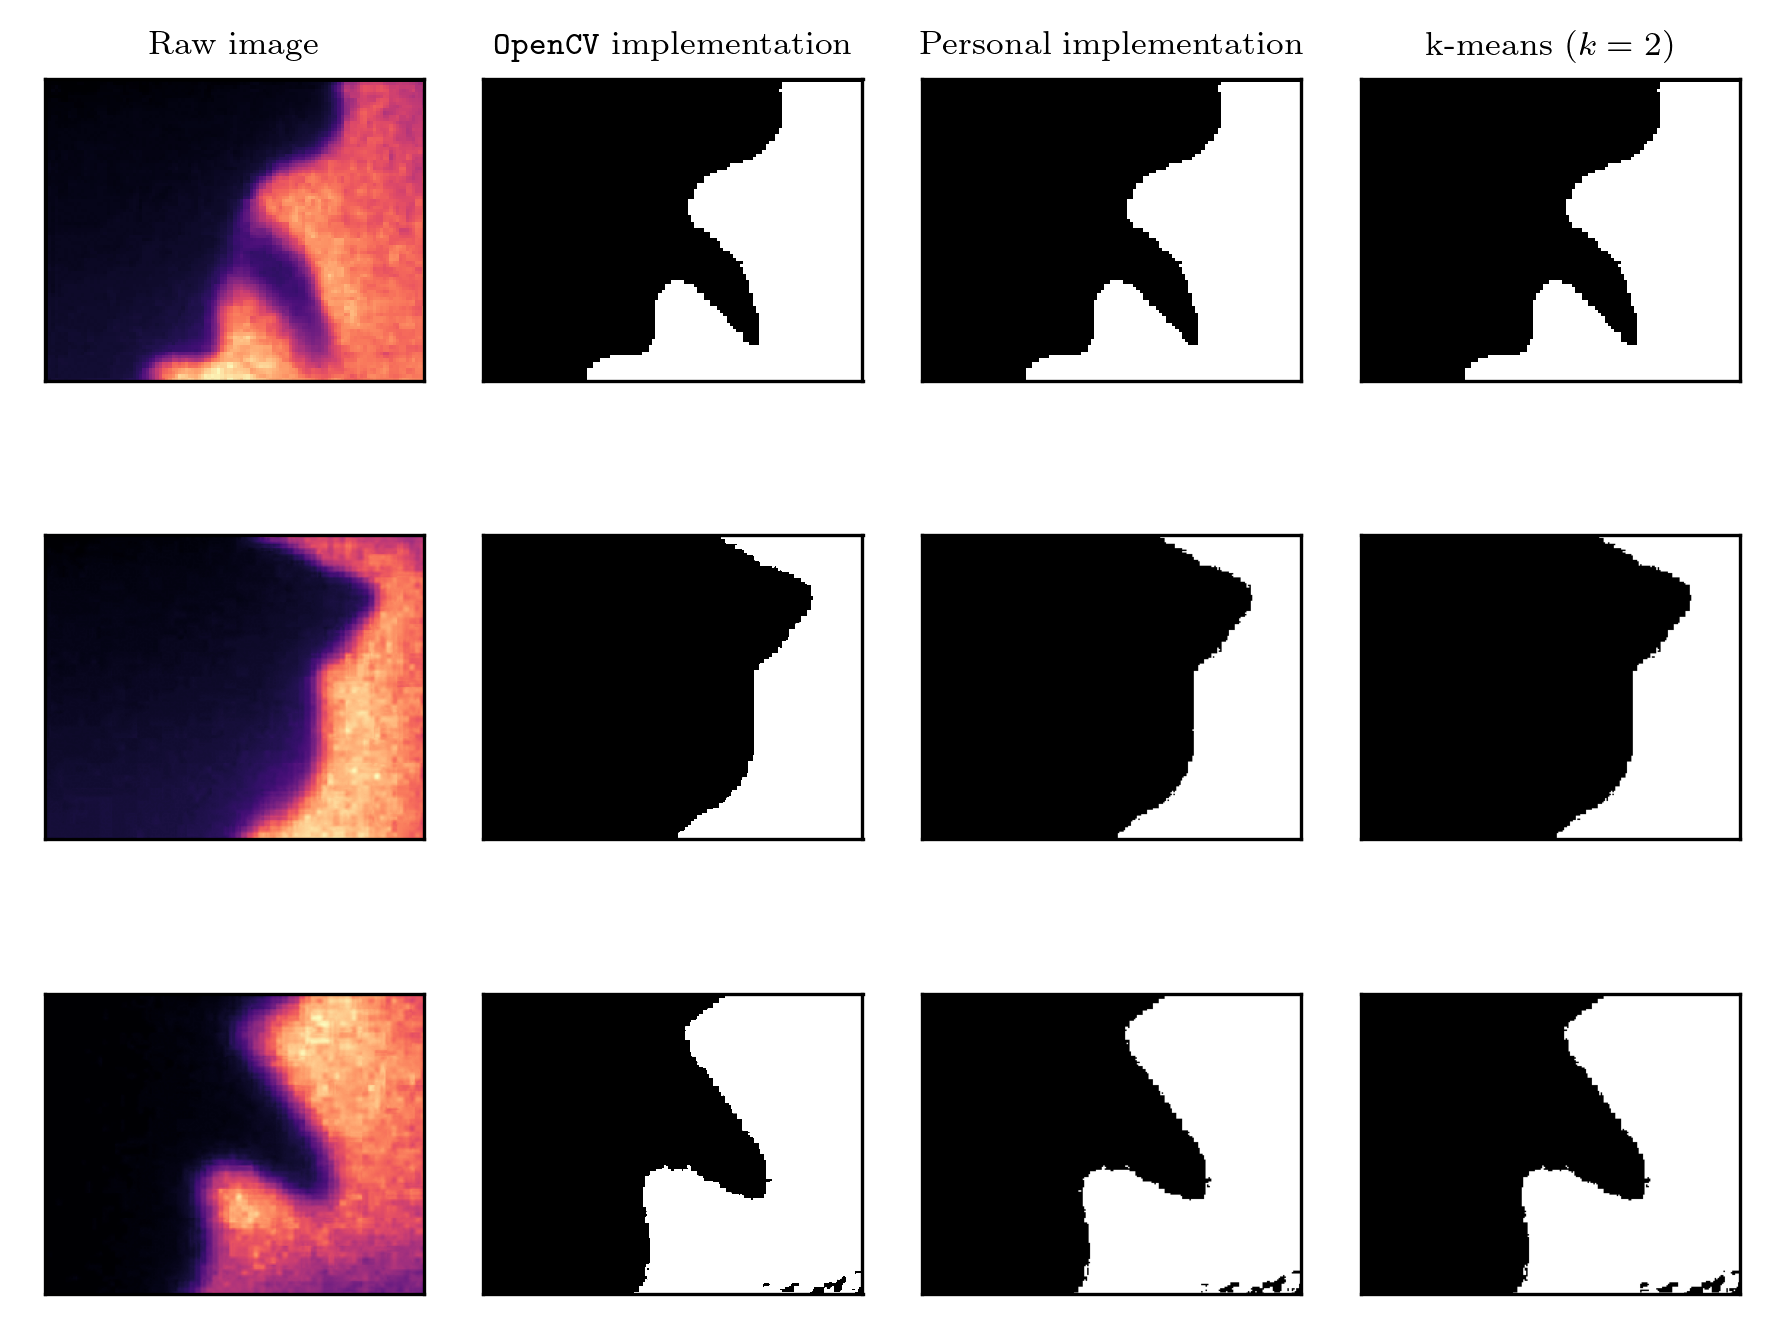

In [45]:
# Creating figure
fig = plt.figure(figsize = (6,5), dpi = 300)

counter = 1
for img_id in [1,2,3]:
    # Loading the single-channel image
    img = cv2.imread(f"demo_images/demo{img_id}.png",cv2.IMREAD_GRAYSCALE)
    
    # Plotting the raw image
    ax = fig.add_subplot(3,4,counter)
    ax.imshow(img, cmap=cMap, vmin=0, vmax=255)
    ax.set_xticks([])
    ax.set_yticks([])
    if img_id == 1:
        plt.title('Raw image', fontsize = fnt)
    counter += 1
    
    # Thresholded image (using OpenCV's implementation)
    ax = fig.add_subplot(3,4,counter)
    cv2_otsu_threshold, img1 = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
    ax.imshow(img1, cmap='gray', vmin=0, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    if img_id == 1:
        plt.title(r'\texttt{OpenCV} implementation', fontsize = fnt)
    counter += 1

    # Thresholded image (using personal implementation)
    ax = fig.add_subplot(3,4,counter)
    otsu_threshold = otsu(img)
    binary_image = (img>=otsu_threshold).astype(int)
    ax.imshow(binary_image, cmap='gray', vmin=0, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    if img_id == 1:
        plt.title('Personal implementation', fontsize = fnt)
    counter += 1
    
    # K-means clustering (k = 2)
    I = img.astype(int).ravel()
    y = np.zeros(I.shape)
    X = np.column_stack((I,y))
    model = KMeans(n_clusters = 2, random_state = 0)
    model.fit(X)
    pred = model.labels_.astype(int)
    pred = pred.reshape((img.shape))
    # The exact binary integer (0 or 1) will vary since kmeans treats it as a cluster label (it is agnostic to intensities in the original image)
    kmeans_threshold = max(np.max(I[pred.ravel()==0]),np.min(I[pred.ravel()==1])-1)
    
    ax = fig.add_subplot(3,4,counter)
    ax.imshow(pred, cmap='gray', vmin=0, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    if img_id == 1:
        plt.title('k-means ($k = 2$)', fontsize = fnt)
    counter += 1
    
    # Printing result
    print('----------------')
    print(f'Image {img_id}')
    print('----------------')
    print(f"OpenCV implementation : Otsu threshold = {int(cv2_otsu_threshold)}")
    print(f"Personal implementation : Otsu threshold = {otsu_threshold}")
    print(f"k-means : Threshold = {kmeans_threshold}")
    print("\n")

plt.tight_layout()
plt.show()